Installing Yahoo Finance api to get data.

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


A kernel restart required after installation, and re-run the code then start Importing important libraries.

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as si

historical daily data via Yahoo Finance for the period from 1 March 2020 to 1 March 2021.

In [3]:
dd = yf.download("^GSPC", start="2020-02-01", end="2021-02-01")

[*********************100%***********************]  1 of 1 completed


Check downloaded data.

In [4]:
dd.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-31,3282.330078,3282.330078,3214.679932,3225.520020,3225.520020,4527830000
2020-02-03,3235.659912,3268.439941,3235.659912,3248.919922,3248.919922,3757910000
2020-02-04,3280.610107,3306.919922,3280.610107,3297.590088,3297.590088,3995320000
2020-02-05,3324.909912,3337.580078,3313.750000,3334.689941,3334.689941,4117730000
2020-02-06,3344.919922,3347.959961,3334.389893,3345.780029,3345.780029,3868370000


In [5]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-01-31 to 2021-01-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


Plot the movement (shape) of the stock (Close/Adj Close price)

<AxesSubplot:xlabel='Date'>

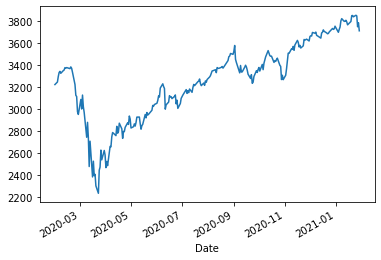

In [6]:
dd['Adj Close'].plot()

calculate its annualised volatility using 12M and 6M historical data.

In [7]:
dd['Adj Close'].describe()

count     252.000000
mean     3256.277817
std       354.561906
min      2237.399902
25%      3034.529907
50%      3317.520020
75%      3502.235046
max      3855.360107
Name: Adj Close, dtype: float64

In [8]:
rets = np.log(dd / dd.shift(1))
rets.head().round(4)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-03,-0.0143,-0.0042,0.0065,0.0072,0.0072,-0.1864
2020-02-04,0.0138,0.0117,0.0138,0.0149,0.0149,0.0613
2020-02-05,0.0134,0.0092,0.0101,0.0112,0.0112,0.0302
2020-02-06,0.0060,0.0031,0.0062,0.0033,0.0033,-0.0625


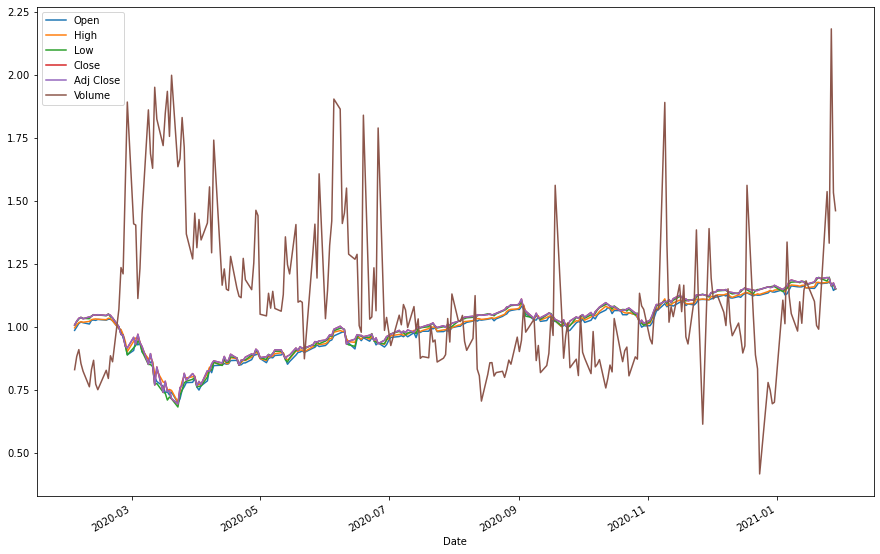

In [9]:
rets.cumsum().apply(np.exp).plot(figsize=(15, 10));

In [10]:
dx = pd.DataFrame(dd['Close']).dropna()
dx.tail()

,Close
Date,
2021-01-25,3855.360107
2021-01-26,3849.620117
2021-01-27,3750.770020
2021-01-28,3787.379883
2021-01-29,3714.239990


In [11]:
window = 10
dx['min'] = dd['Close'].rolling(window=window).min()
dx['mean'] = dd['Close'].rolling(window=window).mean()
dx['std'] = dd['Close'].rolling(window=window).std()
dx['median'] = dd['Close'].rolling(window=window).median()
dx['max'] = dd['Close'].rolling(window=window).max()
dx['ewma'] = dd['Close'].ewm(halflife=0.5, min_periods=window).mean()
dx.dropna().head()

,Close,min,mean,std,median,max,ewma
Date,,,,,,,
2020-02-13,3373.939941,3225.520020,3324.343994,51.780352,3340.234985,3379.449951,3373.789510
2020-02-14,3380.159912,3248.919922,3339.807983,40.945401,3348.935059,3380.159912,3378.567313
2020-02-18,3370.290039,3297.590088,3351.944995,26.424269,3354.920044,3380.159912,3372.359357
2020-02-19,3386.149902,3327.709961,3360.800977,20.318065,3364.020020,3386.149902,3382.702266
2020-02-20,3373.229980,3327.709961,3364.654980,18.377445,3371.760010,3386.149902,3375.598052


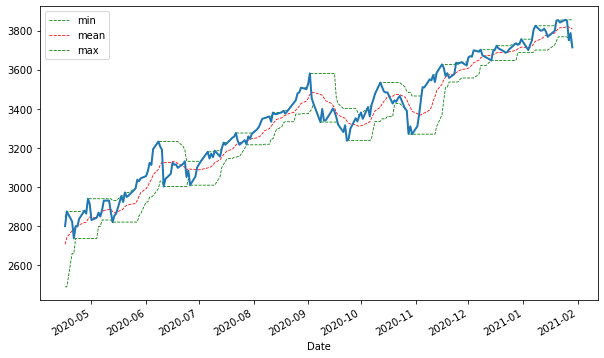

In [12]:
ax = dx[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)
dd['Close'].iloc[-200:].plot(ax=ax, lw=2.0);

In [13]:
dl = np.log(dd / dd.shift(1))
dl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-03,-0.014321,-0.004241,0.006505,0.007228,0.007228,-0.186380
2020-02-04,0.013797,0.011704,0.013797,0.014869,0.014869,0.061261
2020-02-05,0.013413,0.009229,0.010051,0.011188,0.011188,0.030178
2020-02-06,0.006000,0.003105,0.006209,0.003320,0.003320,-0.062469


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

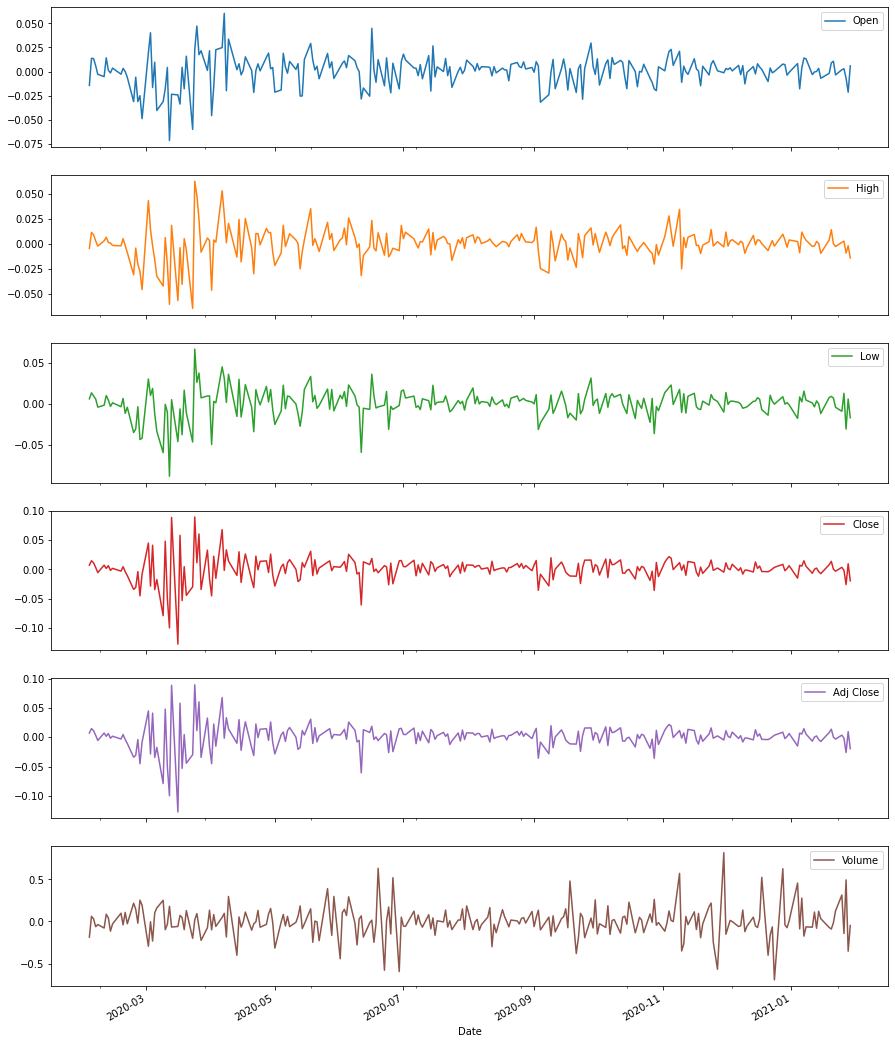

In [14]:
dl.dropna(inplace=True)
dl.plot(subplots=True, figsize=(15, 20))

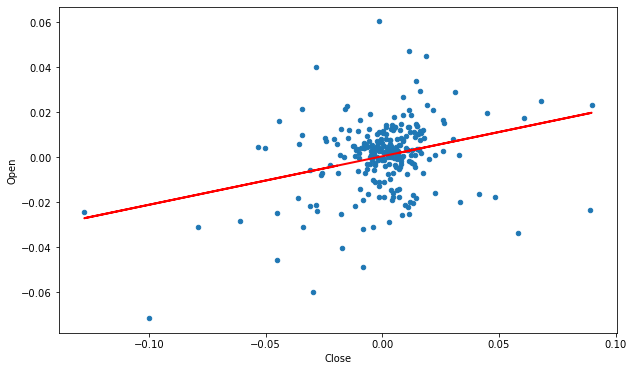

In [15]:
reg = np.polyfit(dl['Close'], dl['Open'], deg=1)
ax = dl.plot(kind='scatter', x='Close', y='Open', figsize=(10, 6))
ax.plot(dl['Close'], np.polyval(reg, dl['Close']), 'r', lw=2);

array([[<AxesSubplot:xlabel='Open', ylabel='Open'>,
        <AxesSubplot:xlabel='High', ylabel='Open'>,
        <AxesSubplot:xlabel='Low', ylabel='Open'>,
        <AxesSubplot:xlabel='Close', ylabel='Open'>,
        <AxesSubplot:xlabel='Adj Close', ylabel='Open'>,
        <AxesSubplot:xlabel='Volume', ylabel='Open'>],
       [<AxesSubplot:xlabel='Open', ylabel='High'>,
        <AxesSubplot:xlabel='High', ylabel='High'>,
        <AxesSubplot:xlabel='Low', ylabel='High'>,
        <AxesSubplot:xlabel='Close', ylabel='High'>,
        <AxesSubplot:xlabel='Adj Close', ylabel='High'>,
        <AxesSubplot:xlabel='Volume', ylabel='High'>],
       [<AxesSubplot:xlabel='Open', ylabel='Low'>,
        <AxesSubplot:xlabel='High', ylabel='Low'>,
        <AxesSubplot:xlabel='Low', ylabel='Low'>,
        <AxesSubplot:xlabel='Close', ylabel='Low'>,
        <AxesSubplot:xlabel='Adj Close', ylabel='Low'>,
        <AxesSubplot:xlabel='Volume', ylabel='Low'>],
       [<AxesSubplot:xlabel='Open', ylabel='Cl

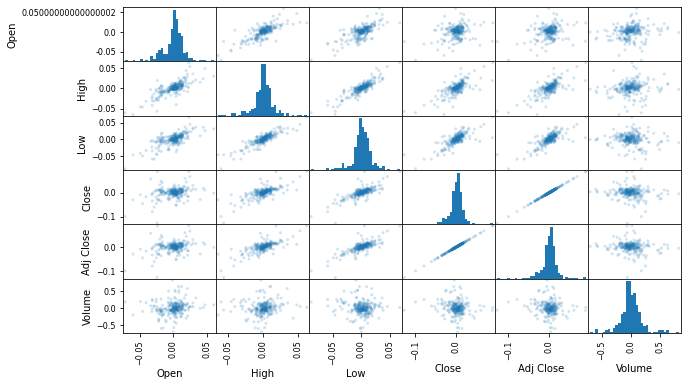

In [16]:
pd.plotting.scatter_matrix(dl, alpha=0.2, diagonal='hist', hist_kwds={'bins': 35}, figsize=(10, 6))

In [17]:
def europt(S, K, T, r, q, vol, payoff):    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [18]:
europt(100, 100, 1, 0.05, 0.03, 0.25, 'call')

10.549284934339425

In [19]:
europt(100, 100, 1, 0.05, 0.03, 0.25, 'put')

8.627674029559998

In [21]:
def euro_option_bsm(S, K, T, r, q, vol, payoff):    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value =  - S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

S = np.linspace(50,150,11)
Put = np.zeros((len(S),1))
for i in range(len(S)):
    Put [i] = euro_option_bsm(S[i], 100, 1, 0.05, 0.03, 0.25, 'put')

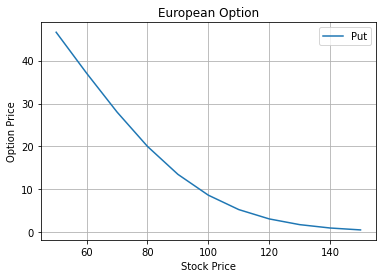

In [22]:
fig = plt.figure()
plt.plot(S, Put, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Put'])

In [23]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [24]:
speed(100, 100, 1, 0.05, 0.03, 0.25, 'call')

0.00027598596555669614

In [25]:
speed(100, 100, 1, 0.05, 0.03, 0.25, 'put')

0.00027598596555669614

In [26]:
S = np.linspace(50,150,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 100, 1, 0.05, 0.03, 0.25, 'call')

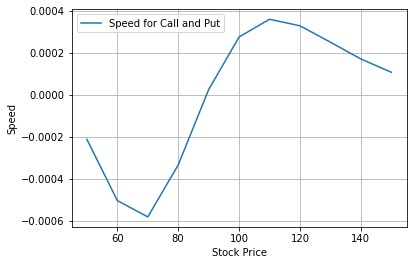

In [27]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.legend(['Speed for Call and Put'])